# Download BioMassters Data

### Download using command line

In [6]:
%cd ~/projects/dd-biomassters/
!python ./pix2pix/datasets/biomassters_downloader.py \
    --phase train \
    --dataroot ./data \
    --metadata_file ./data/metadata/features_metadata_split_42.csv \
    --dataset_size 1000 \
    --is_imputable_s1 \
    --satellite S1 \

/home/ubuntu/projects/dd-biomassters
0 c6154538
1 f112fcf1
2 cf8a7594
3 00ff36dd
4 67c3be04
5 1718f00d
6 66c1a458
7 01ccc4cf
8 ce49f607
9 a307ac91
10 b142c357
11 0610fc19
12 94465264
13 f4a212e3
14 f822769e
15 a5fad3b7
16 31698b5d
17 6bca9a38
18 d1a4a334
19 f2e15209
20 3ab08b40
21 92fd5670
22 512ef0be
23 4abeab14
24 3e398cfe
25 29238ab7
26 3a3398df
27 19842835
28 cd25f538
29 dba50c51
30 76953691
31 62e0f14d
32 0131497d
33 1e09df9e
34 7f36fddf
35 95bfa78b
36 8c94e3ad
37 add091ae
38 53095eac
39 641b7ad2
40 ed2f7a7c
41 9c2d26a5
42 23d486b5
43 54e0766a
44 91fac078
45 99ea7e0b
46 12224d5f
47 8a034368
48 9662c5d2
49 f30802c2
50 66133b24
51 5dfc16de
52 26ef32b5
53 fab8e39b
54 04203dc4
55 222abd19
56 d0722526
57 9bec470b
58 f016331a
59 5ba504e6
60 f96c68c0
61 ef699037
62 ec1f5511
63 30875b12
64 33ea947f
65 38e926b9
66 abb9e525
67 3ccfcac5
68 9a6abb7b
69 56400043
70 f044715b
71 1549f396
72 5a2aa82c
73 8106f35b
74 f579f6be
75 1f874243
76 31871700
77 2a769c28
78 15728cd4
79 844277e5
80 0b0926dd
8

639 4618c2da
640 e16fbc4e
641 efcf3465
642 309792e5
643 8cc5933c
644 131c9c06
645 665d056f
646 c31a8000
647 92289d5a
648 e37f2403
649 d247abbb
650 f11ecfea
651 6513c9a3
652 1df48338
653 651ef6c7
654 0b5de22d
655 0c6dc601
656 1942f772
657 29da1a41
658 d7e28fc8
659 9f94c1d4
660 12cc0324
661 502ba4e4
662 0a6bc33f
663 4e5d4d74
664 a915be02
665 a86afab3
666 8165fc74
667 d4b5b753
668 da5dad3f
669 0d129e66
670 9aa61443
671 051dc280
672 acc99584
673 587c17bb
674 865cbfe3
675 462e7539
676 433e3dd6
677 ec31a809
678 95996b76
679 46b913de
680 6feddf13
681 6f484a7c
682 e8554baf
683 c6e7b8a9
684 5d9667fc
685 0b3349ff
686 a899bfe4
687 1a6df311
688 11a05bb0
689 d13e4a15
690 290a8c07
691 1fdba21b
692 7a9d2ab7
693 0bac0847
694 63347854
695 54d9f1fa
696 11082fab
697 166be7d7
698 43d1bb0f
699 109be0f6
700 c3769534
701 5621aa3b
702 b282df42
703 47c6be30
704 bcc638e4
705 0693e0a4
706 ce3a9544
707 169059e0
708 5400b6c7
709 0dd93df8
710 dc1e86e8
711 d254e3d3
712 4741007f
713 a043365b
714 78a683b3
715 1bd933c5

### Download from module

In [5]:
%cd ~/projects/dd-biomassters/pix2pix/
from datasets.biomassters_downloader import BioMasstersDownloader

metadata_file = "../data/metadata/features_metadata_split_42.csv"
dd = BioMasstersDownloader(
    phase='train', 
    dataroot='../data/', 
    dataset_size=5,
    metadata_file=metadata_file, 
    satellite='S1',
    chip_is_complete=False, 
    is_imputable_s1=True)
dd.run(load_tif=True)

/home/ubuntu/projects/dd-biomassters/pix2pix
0 c6154538
1 f112fcf1
2 cf8a7594
3 00ff36dd
4 67c3be04


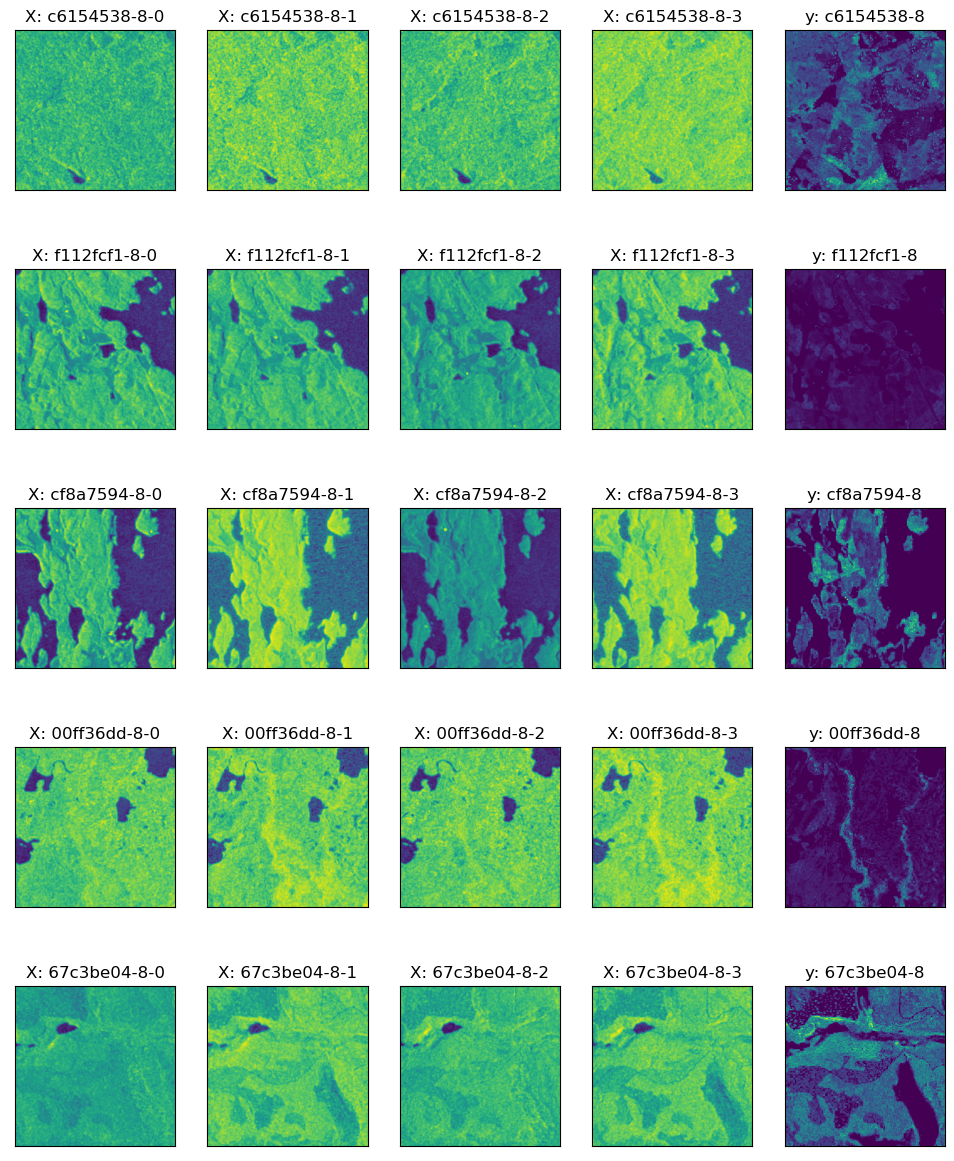

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

num_images = min(len(dd.images), 20)
satellite = 1
month = 8
offset, num_channels = (48 + month * 11, 11) if satellite == 2 else (0 + month * 4, 4)

fig, axes = plt.subplots(nrows=num_images, ncols=num_channels+1, figsize=(3*num_channels,3*num_images))
axes = axes.flatten()
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

for i, data in enumerate(dd.images):
    chip_id, X, y = data.values()
    for ch in range(num_channels):
        idx = i*(num_channels+1) + ch 
        axes[idx].imshow(X[:,:,ch + offset])
        axes[idx].set_title(f'X: {chip_id}-{month}-{ch}')
    axes[idx+1].imshow(y)
    axes[idx+1].set_title(f'y: {chip_id}-{month}')